In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("data/external_Microsoft_issueDataset.csv")
df.head()

,Access Level,BD877Training Completed,Department Code,Email Domain,EmployeeTargetedOverPastYear,Gender (code),Social Media Activity (Scaled),behaviorPattern2,fraudTraining Completed,peerUsageMetric6,usageMetric2,usageMetric5
0,2,0.0,24999,ox.ac.uk,0.0,0,0.0,0,1,5,0,7
1,2,0.0,10000,ox.ac.uk,1.0,1,NaN,0,0,4,0,1
2,0,0.0,10000,si.edu,1.0,1,0.0,0,1,0,0,3
3,2,1.0,54997,si.edu,0.0,0,1.0,1,0,5,1,7
4,1,1.0,10000,si.edu,1.0,1,0.0,2,0,5,0,7


In [3]:
df.describe()

,Access Level,BD877Training Completed,Department Code,EmployeeTargetedOverPastYear,Gender (code),Social Media Activity (Scaled),behaviorPattern2,fraudTraining Completed,peerUsageMetric6,usageMetric2,usageMetric5
count,14000.000000,13688.000000,14000.000000,14000.000000,14000.000000,13739.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000
mean,2.504143,0.499196,32413.862786,0.731643,0.498286,0.802679,0.904429,0.503286,2.987571,0.764786,3.471000
std,1.733468,0.500018,24471.894437,0.443120,0.500015,0.896202,0.953978,0.500007,2.003815,0.876161,2.280655
min,0.000000,0.000000,10000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,10000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,2.000000,0.000000,24999.000000,1.000000,0.000000,1.000000,1.000000,1.000000,3.000000,1.000000,3.000000
75%,4.000000,1.000000,39998.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,5.000000
max,7.000000,1.000000,84995.000000,1.000000,1.000000,7.000000,7.000000,1.000000,6.000000,7.000000,7.000000


In [4]:
df.dtypes

Access Level                        int64
BD877Training Completed           float64
Department Code                     int64
Email Domain                       object
EmployeeTargetedOverPastYear      float64
Gender (code)                       int64
Social Media Activity (Scaled)    float64
behaviorPattern2                    int64
fraudTraining Completed             int64
peerUsageMetric6                    int64
usageMetric2                        int64
usageMetric5                        int64
dtype: object

# Exploratory Data Analysis

In [5]:
df.shape

(14000, 12)

Check if the dataset contain any missing values.

In [6]:
df.isna().sum()

Access Level                        0
BD877Training Completed           312
Department Code                     0
Email Domain                      265
EmployeeTargetedOverPastYear        0
Gender (code)                       0
Social Media Activity (Scaled)    261
behaviorPattern2                    0
fraudTraining Completed             0
peerUsageMetric6                    0
usageMetric2                        0
usageMetric5                        0
dtype: int64

[Text(0.5, 0, 'EmployeeTargetedOverPastYear'), Text(0, 0.5, 'Frequency')]

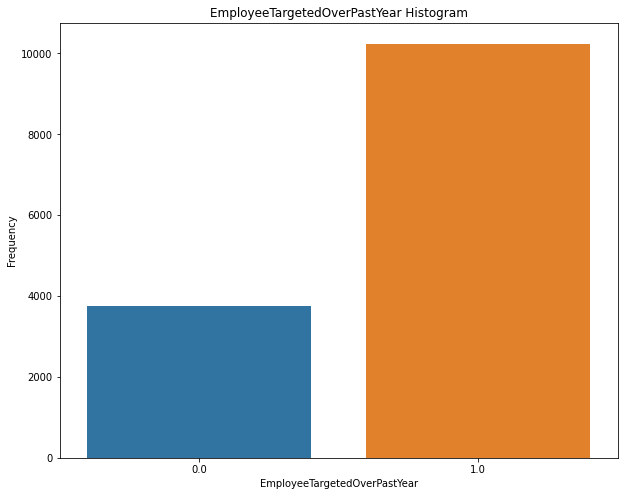

In [7]:
target_col = "EmployeeTargetedOverPastYear"
plt.figure(figsize=(10, 8))

plt.title(target_col+' Histogram')
ax = sns.countplot(df[target_col])
ax.set(xlabel = target_col, ylabel='Frequency')

The dataset target is not balanced, we might need to check some imbalanced modeling consideration (such as undersampling, oversampling or class weights ...)

## Distribution of numerical variables

Plot the distribution of the numerical features.

We don't seem to have any numerical features

In [8]:
num_cols = []
fig_rows = np.ceil(len(num_cols)/2)

plt.figure(figsize=(15, fig_rows*5))
plt.subplots_adjust(hspace=0.5)

for ind, col in enumerate(num_cols):
    plt.subplot(fig_rows,2,ind+1)
    plt.title(col+' Distribution')
    ax = sns.distplot(df[col], bins=15)
    ax.set(xlabel = col, ylabel='Frequency')

<Figure size 1080x0 with 0 Axes>

Feature Engineering Tip: Z-score normalization (standarization)

Plot the distribution of the numerical features for different target values.

In [9]:
num_cols = []
fig_rows = np.ceil(len(num_cols)/2)

plt.figure(figsize=(15, fig_rows*5))
plt.subplots_adjust(hspace=0.5)

targets = df[target_col].unique().tolist()

for ind, col in enumerate(num_cols):
    plt.subplot(fig_rows,2,ind+1)
    plt.title(col+' Distribution')
    
    for target in targets: 
        ax = sns.distplot(df[df[target_col] == target][col], label = target, bins=20)
        ax.set(xlabel = col, ylabel='Frequency')
        ax.legend()

<Figure size 1080x0 with 0 Axes>

## Distribution of catagorical variables

### Ordinal categorical data

Plotting the histogram of the ordinal catagorical features.

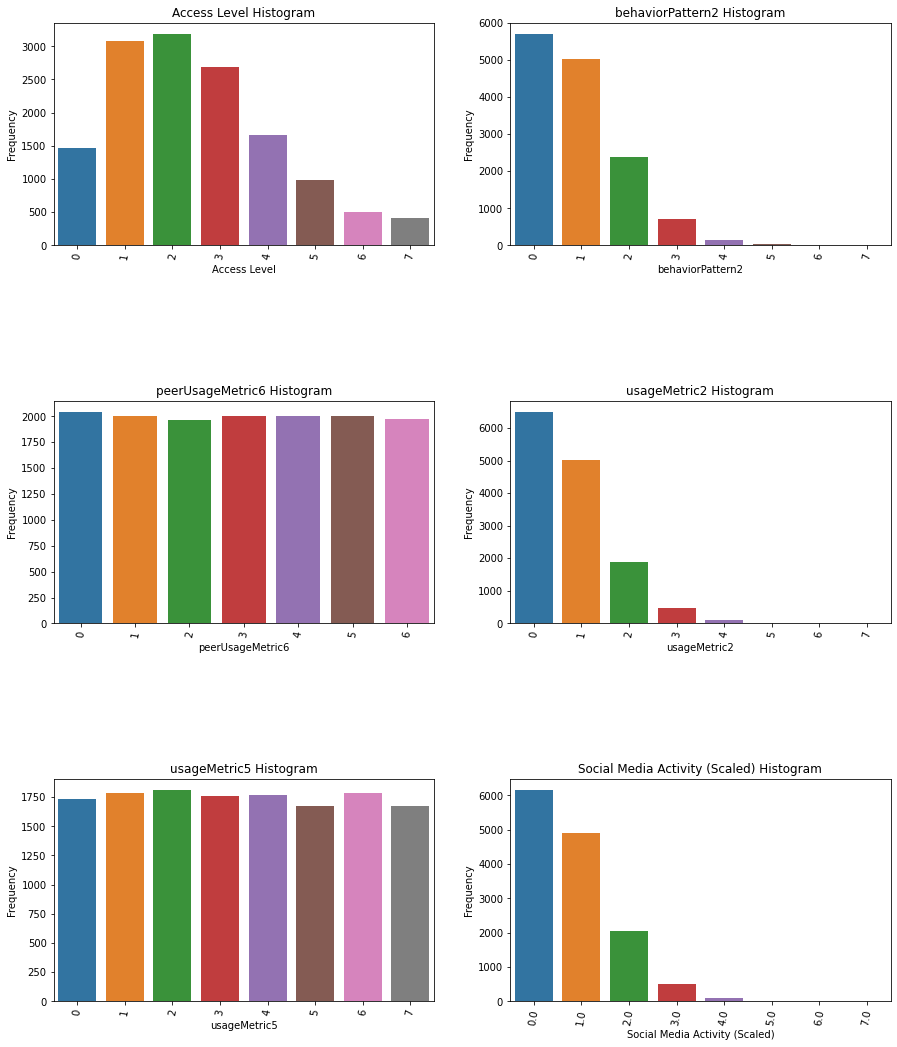

In [10]:
cat_cols_ord = ["Access Level", 
                "behaviorPattern2", 
                "peerUsageMetric6",
                "usageMetric2", 
                "usageMetric5",
                "Social Media Activity (Scaled)"]


fig_rows = np.ceil(len(cat_cols_ord)/2)

plt.figure(figsize=(15, fig_rows*6))
plt.subplots_adjust(hspace=0.7)

for ind, col in enumerate(cat_cols_ord):
    plt.subplot(fig_rows,2,ind+1)
    plt.title(col+' Histogram')
    ax = sns.countplot(df[col])
    ax.set(xlabel = col, ylabel='Frequency')
    xtickslabels=ax.get_xticklabels()
    ax.set_xticklabels(xtickslabels, rotation=80)
    # reduce number of ticks when too many
    if(len(xtickslabels)>20):
        for ind, label in enumerate(xtickslabels):
            if ind % 5 == 0:  # every 10th label is kept
                label.set_visible(True)
            else:
                label.set_visible(False)

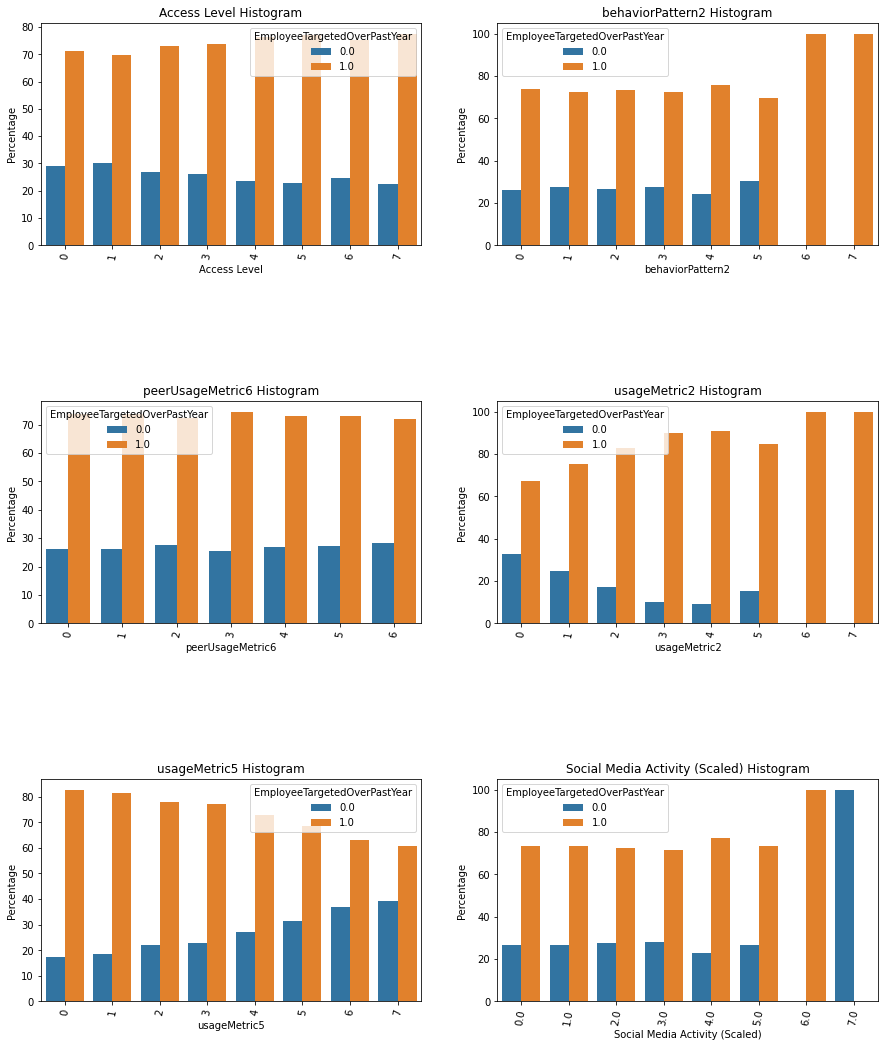

In [11]:
cat_cols_ord = ["Access Level", 
                "behaviorPattern2", 
                "peerUsageMetric6",
                "usageMetric2", 
                "usageMetric5",
                "Social Media Activity (Scaled)"]


fig_rows = np.ceil(len(cat_cols_ord)/2)

plt.figure(figsize=(15, fig_rows*6))
plt.subplots_adjust(hspace=0.7)

for ind, col in enumerate(cat_cols_ord):
    plt.subplot(fig_rows,2,ind+1)
    plt.title(col+' Histogram')
    
    counts = (df.groupby([col])[target_col]
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values(col))
    
    
    ax = sns.barplot(x=col, y="percentage", hue=target_col, data=counts)
    ax.set(xlabel = col, ylabel='Percentage')
    
    xtickslabels=ax.get_xticklabels()
    ax.set_xticklabels(xtickslabels, rotation=80)
    # reduce number of ticks when too many
    if(len(xtickslabels)>20):
        for ind, label in enumerate(xtickslabels):
            if ind % 5 == 0:  # every 10th label is kept
                label.set_visible(True)
            else:
                label.set_visible(False)

Feature Engineering Tip: Min-Max normalization

### Nominal categorical data

Plotting the histogram of the nominal catagorical features.

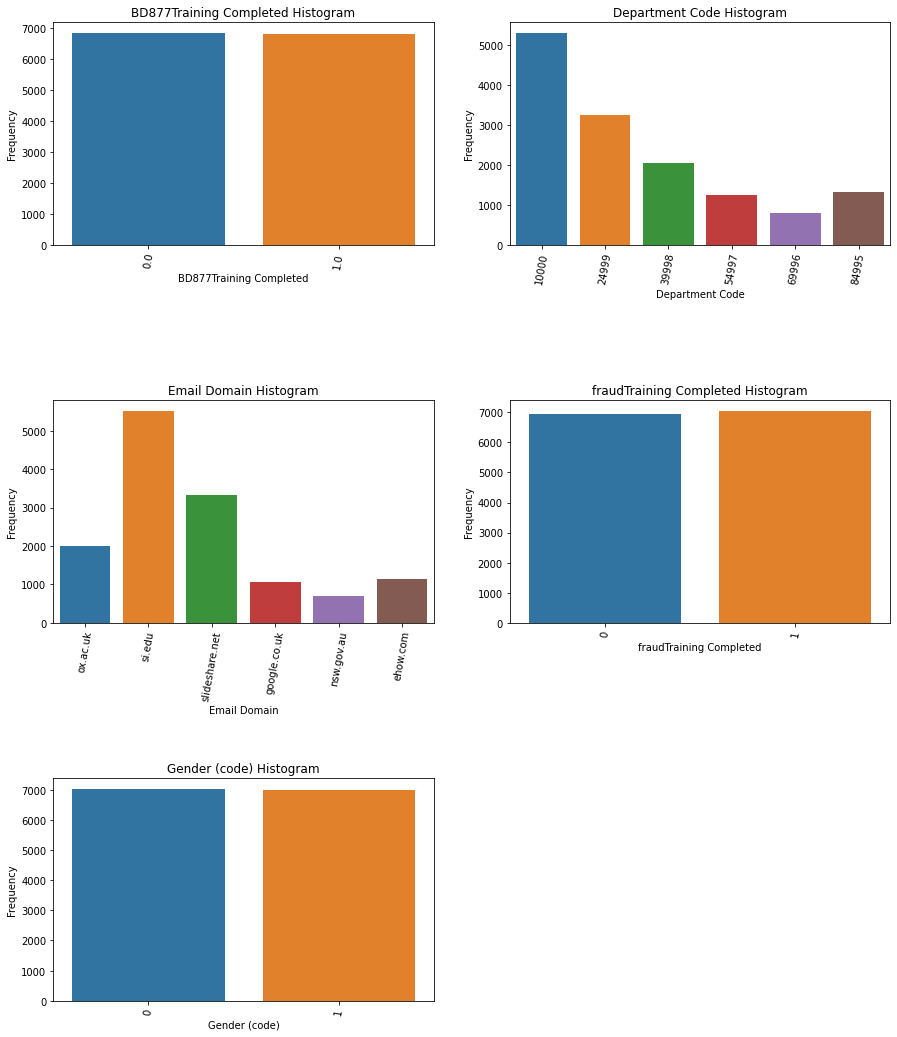

In [12]:
cat_cols_nom = ['BD877Training Completed',
                'Department Code', 
                'Email Domain',
                'fraudTraining Completed',
                'Gender (code)']

fig_rows = np.ceil(len(cat_cols_nom)/2)

plt.figure(figsize=(15, fig_rows*6))
plt.subplots_adjust(hspace=0.7)

for ind, col in enumerate(cat_cols_nom):
    plt.subplot(fig_rows,2,ind+1)
    plt.title(col+' Histogram')
    ax = sns.countplot(df[col])
    ax.set(xlabel = col, ylabel='Frequency')
    xtickslabels=ax.get_xticklabels()
    ax.set_xticklabels(xtickslabels, rotation=80)
    # reduce number of ticks when too many
    if(len(xtickslabels)>20):
        for ind, label in enumerate(xtickslabels):
            if ind % 5 == 0:  # every 10th label is kept
                label.set_visible(True)
            else:
                label.set_visible(False)

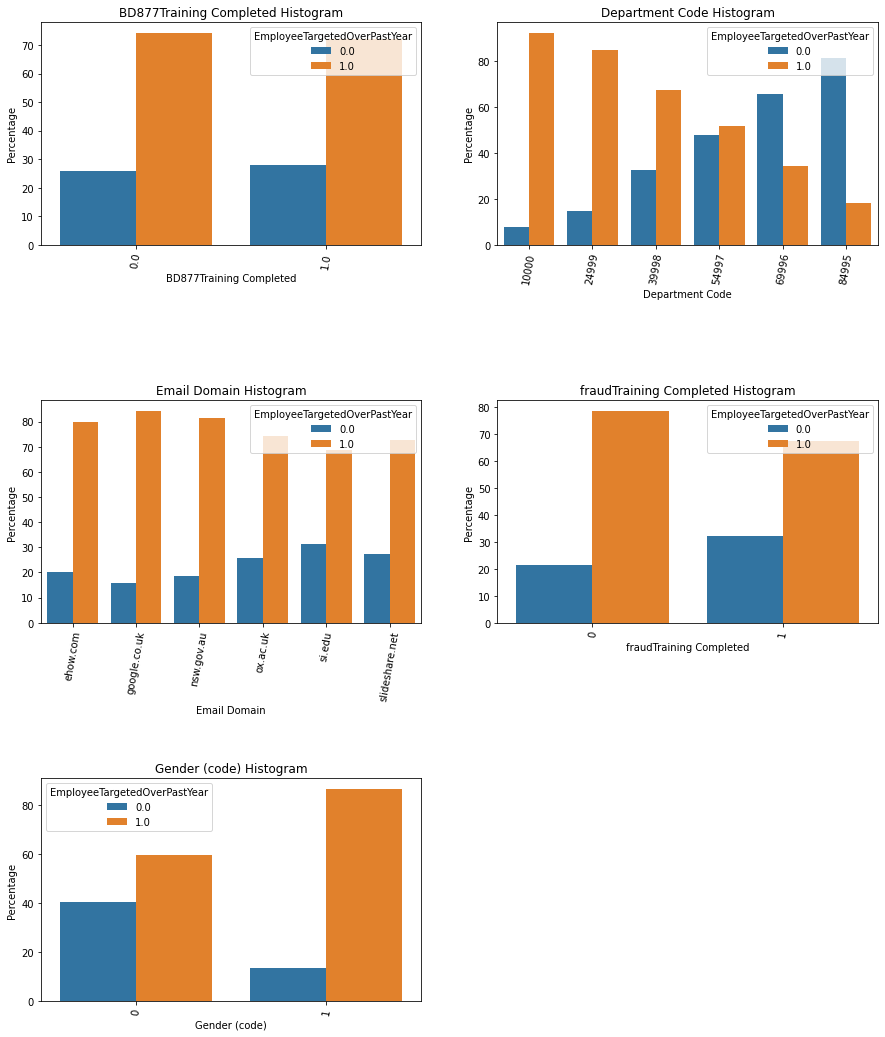

In [13]:
cat_cols_nom = ['BD877Training Completed',
                'Department Code', 
                'Email Domain',
                'fraudTraining Completed',
                'Gender (code)']

fig_rows = np.ceil(len(cat_cols_nom)/2)

plt.figure(figsize=(15, fig_rows*6))
plt.subplots_adjust(hspace=0.7)

for ind, col in enumerate(cat_cols_nom):
    plt.subplot(fig_rows,2,ind+1)
    plt.title(col+' Histogram')
    
    counts = (df.groupby([col])[target_col]
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values(col))
    
    
    ax = sns.barplot(x=col, y="percentage", hue=target_col, data=counts)
    ax.set(xlabel = col, ylabel='Percentage')
    
    xtickslabels=ax.get_xticklabels()
    ax.set_xticklabels(xtickslabels, rotation=80)
    # reduce number of ticks when too many
    if(len(xtickslabels)>20):
        for ind, label in enumerate(xtickslabels):
            if ind % 5 == 0:  # every 10th label is kept
                label.set_visible(True)
            else:
                label.set_visible(False)

Feature Engineering Tip: One Hot Encoding

## Correlations

<AxesSubplot:>

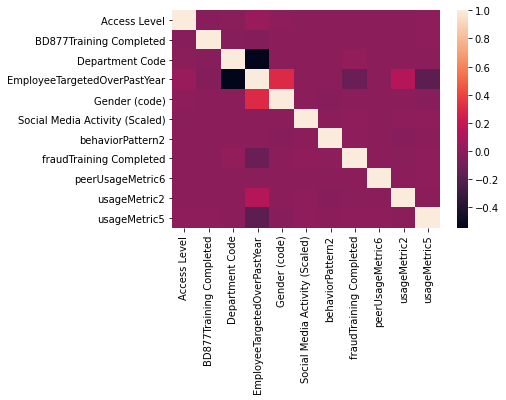

In [14]:
corr = df.corr()
sns.heatmap(corr)

Pay attention to the fact that departement code is treated like a numeric here.

# Prepare ML datasets

Let's split our dataset into a training dataset and a testing dataset and save these as csv files for later modeling.

We'll assign 80% of our data to the training set, and the remaining 20% of the data to the testing set.

In [15]:
# create training and testing sets
np.random.seed(seed=1) # set seed to ensure reproducibility

msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

In [16]:
train.to_csv("data/train.csv", index=False)
test.to_csv("data/test.csv", index=False)

In [17]:
print("Training set: ", train.shape)
print("Testing set: ", test.shape)

Training set:  (11214, 12)
Testing set:  (2786, 12)
